Preliminary exploratory data analysis:

    - Demonstrate that the dataset can be read from the web into R 
    - Clean and wrangle your data into a tidy format
    - Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
    - Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compa
    res the distributions of each of the predictor variables you plan to use in your analysis.

In [30]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [31]:
wine_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", col_names = FALSE) |>
    mutate(X1 = as_factor(X1))
colnames(wine_data) <- c("class","alcohol", "malic.acid", "ash", "alcalinity.of.ash","magnesium", "total.phenols",
                         "flavanoids", "nonfalvanoid.phenols", "proanthocyanins", "color.intensity", "hue",
                         "OD280.OD315.of.diluted.wines", "proline")
wine_data

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [32]:
wine_split <- initial_split(wine_data, prop = 0.75, strata = class)  
wine_training <- training(wine_split)   
wine_testing <- testing(wine_split)
wine_training
wine_testing

class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
1,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740


In [33]:
wine_mean <- wine_training |>
    summarise(across(alcohol:proline, mean)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'mean') 
wine_min <- wine_training |>
    summarise(across(alcohol:proline, min)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'min') 
wine_max <- wine_training |>
    summarise(across(alcohol:proline, max)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'max') 
wine_sd <- wine_training |>
    summarise(across(alcohol:proline, sd)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'sd') 

wine_stats <- wine_min |>
    bind_cols(wine_max |> select(max)) |>
    bind_cols(wine_mean |> select(mean)) |>
    bind_cols(wine_sd |> select(sd))

wine_stats

wine_proportions <- wine_training |>
    group_by(class) |>
    summarize(n = n())
wine_proportions

attribute,min,max,mean,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alcohol,11.03,14.83,13.040677,0.8274305
malic.acid,0.74,5.80,2.385489,1.1362128
ash,1.36,3.23,2.366541,0.2733935
⋮,⋮,⋮,⋮,⋮
hue,0.48,1.71,0.9577895,0.2274307
OD280.OD315.of.diluted.wines,1.27,3.92,2.6254887,0.7256768
proline,278.00,1680.00,735.1127820,310.2680331


class,n
<fct>,<int>
1,44
2,53
3,36


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,⋯,scaled.alcalinity.of.ash,scaled.magnesium,scaled.total.phenols,scaled.flavanoids,scaled.nonfalvanoid.phenols,scaled.proanthocyanins,scaled.color.intensity,scaled.hue,scaled.OD280.OD315.of.diluted.wines,scaled.proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,⋯,-1.1192937,1.99850714,0.7954596,0.9989566,-0.6800290,1.1854573,0.2772471,0.3614750,1.7838676,1.063233
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,⋯,-2.3786874,0.02690298,0.5544296,0.7060096,-0.8380095,-0.5202248,-0.2823900,0.4054444,1.0672951,1.014888
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,⋯,-0.2606162,0.09992536,0.7954596,1.1747248,-0.5220485,2.0636303,0.2950134,0.3175056,0.7503496,1.449995
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,⋯,0.140100,1.4873505,-1.1488496,-1.315325,0.504825,-0.4020092,2.302600,-1.617149,-1.468269,0.3219385
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,⋯,0.140100,1.4873505,-1.0524376,-1.325090,1.294728,-0.2162418,1.902860,-1.573180,-1.385588,0.3380536
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,⋯,1.428116,-0.2651865,-0.4096907,-1.246970,1.531698,-0.4020092,1.858444,-1.529210,-1.413148,-0.5643920


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



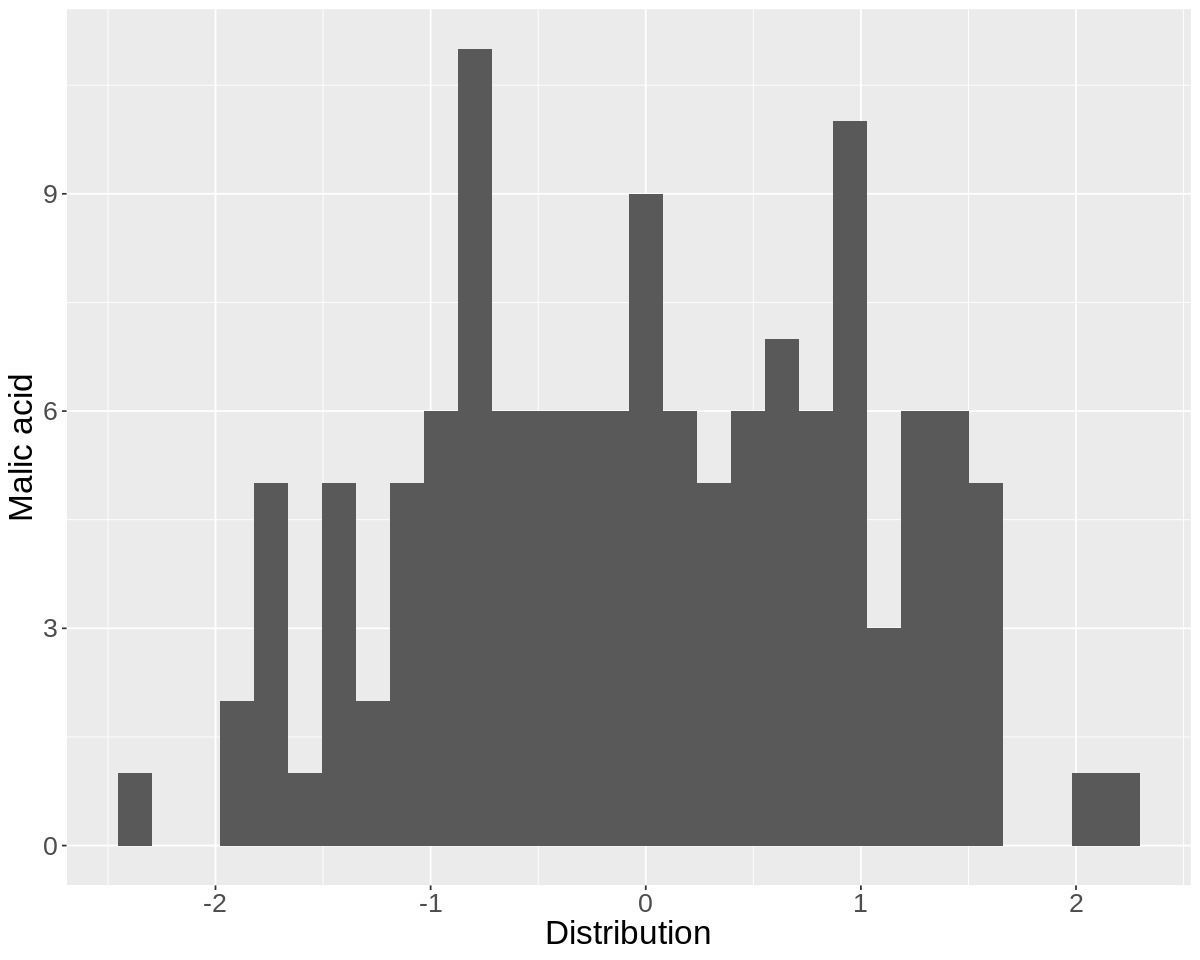

In [34]:
wine_data_scaled <- wine_training |>
    mutate(scaled.alcohol = scale(alcohol, center = TRUE)) |>
    mutate(scaled.malic_acid = scale(malic.acid, center = TRUE)) |>
    mutate(scaled.ash = scale(ash, center = TRUE)) |>
    mutate(scaled.alcalinity.of.ash = scale(alcalinity.of.ash, center = TRUE)) |>
    mutate(scaled.magnesium = scale(magnesium, center = TRUE)) |>
    mutate(scaled.total.phenols = scale(total.phenols, center = TRUE)) |>
    mutate(scaled.flavanoids = scale(flavanoids, center = TRUE)) |>
    mutate(scaled.nonfalvanoid.phenols = scale(nonfalvanoid.phenols, center = TRUE)) |>
    mutate(scaled.proanthocyanins = scale(proanthocyanins, center = TRUE)) |>
    mutate(scaled.color.intensity = scale(color.intensity, center = TRUE)) |>
    mutate(scaled.hue = scale(hue, center = TRUE)) |>
    mutate(scaled.OD280.OD315.of.diluted.wines = scale(OD280.OD315.of.diluted.wines, center = TRUE)) |>
    mutate(scaled.proline = scale(proline, center = TRUE))
wine_data_scaled

options(repr.plot.width = 10, repr.plot.height = 8)
wine_plot <- wine_data_scaled |>
    ggplot(aes(x = scaled.alcohol)) +
    geom_histogram() +
labs(x = "Distribution", y = "Malic acid") +
    theme(text = element_text(size = 20))
wine_plot